# Airline Delays USA - Jan 2020

In [ ]:
#grab a dataset
#This file contains all the flights starting from 1st January 2020 till 31st January 2020. 
#There are around 400,000 rows in this file and 21 feature columns indicating the features of the flight including information 
#about origin airport, destination airport, airplane information, departure time and arrival time.

In [223]:
#This dataset is a useful as it provides good opportunities to do exploratory data analysis. It also provides scope to clean 
#the dataset and explore other concepts in the course such as importing from a Html file and link it to the data for more 
#descriptive analysis for the end user.

# Table of Contents

In [226]:
# 1. Setup the appropriate Libraries

In [228]:
# 2. Load the Data

In [227]:
# 3. Inspect the Data

In [229]:
# 4. Missing Values

In [230]:
# 5. Exploratory Data Analysis
# 5.1.1 By Airport
# 5.1.2 By Airline

In [231]:
# 6. Conclusion

In [232]:
# 7. Future Work

In [233]:
# 8. Appendix

## 1. Setup the appropriate libraries

In [1]:
#setup python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

## 2. Load the Data


In [2]:
df = pd.read_csv('../Datasets/Jan_2020_ontime.csv')

In [3]:
#make the headings useful such as removing spaces and Upper case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,unnamed:_21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [5]:
#remove column with no data
df = df.drop('unnamed:_21', axis=1)

In [6]:
#get descriptive data for the dataset
data = pd.read_html('https://aspmhelp.faa.gov/index.php/ASQP:_Carrier_Codes_and_Names')
df_html = pd.DataFrame(data[0])
df_html.head()

,IATA Code,ICAO Code,Air Carrier Name
0,ZW,AWI,Air Wisconsin
1,AS,ASA,Alaska Airlines
2,G4,AAY,Allegiant Air LLC
3,AA,AAL,American Airlines
4,C5,UCA,Champlain Air


In [7]:
df_html.columns = df_html.columns.str.lower().str.replace(' ', '_')
df_html.head()

,iata_code,icao_code,air_carrier_name
0,ZW,AWI,Air Wisconsin
1,AS,ASA,Alaska Airlines
2,G4,AAY,Allegiant Air LLC
3,AA,AAL,American Airlines
4,C5,UCA,Champlain Air


In [8]:
df.shape

(607346, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   day_of_month           607346 non-null  int64  
 1   day_of_week            607346 non-null  int64  
 2   op_unique_carrier      607346 non-null  object 
 3   op_carrier_airline_id  607346 non-null  int64  
 4   op_carrier             607346 non-null  object 
 5   tail_num               606648 non-null  object 
 6   op_carrier_fl_num      607346 non-null  int64  
 7   origin_airport_id      607346 non-null  int64  
 8   origin_airport_seq_id  607346 non-null  int64  
 9   origin                 607346 non-null  object 
 10  dest_airport_id        607346 non-null  int64  
 11  dest_airport_seq_id    607346 non-null  int64  
 12  dest                   607346 non-null  object 
 13  dep_time               600682 non-null  float64
 14  dep_del15              600647 non-nu

In [10]:
#add the air carrier name in the dataframe
Jan2020 = pd.merge(left=df, right=df_html, how='inner', left_on='op_carrier',right_on='iata_code').drop('iata_code', axis=1)
Jan2020 = Jan2020.drop('icao_code', axis=1)
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines


In [11]:
Jan2020.shape

(607346, 22)

In [12]:
#get descriptive data for the dataset
#data = pd.read_html('https://www.leonardsguide.com/us-airport-codes.shtml')
data = pd.read_html('https://www.airportcodes.us/us-airports.htm',header = 1)
df_airport = pd.DataFrame(data[1])
#df_airport.rename(columns={0:'airport'}, inplace=True)
#df_airport.rename(columns={1:'airport_code'}, inplace=True)
df_airport.head(30)

,Code,Name,City,State
0,0AK,Pilot Station Airport,Pilot Station,AK
1,16A,Nunapitchuk Airport,Nunapitchuk,AK
2,1G4,Grand Canyon West Airport,Peach Springs,AZ
3,2A3,Larsen Bay Airport,Larsen Bay,AK
4,2A9,Kotlik Airport,Kotlik,AK
5,3A5,Marshall Don Hunter Sr,Marshall,AK
6,3T7,Middle Bass Island Airport,Middle Bass,OH
7,3W2,Put - in - Bay Airport,Put - in - Bay,OH
8,6R7,Old Harbor Airport,Old Harbor,AK
9,74S,Anacortes Airport,Anacortes,WA


In [13]:
df_airport.columns = df_airport.columns.str.strip()

In [14]:
df_airport.columns = df_airport.columns.str.lower().str.replace(' ', '_')
df_airport.head()

,code,name,city,state
0,0AK,Pilot Station Airport,Pilot Station,AK
1,16A,Nunapitchuk Airport,Nunapitchuk,AK
2,1G4,Grand Canyon West Airport,Peach Springs,AZ
3,2A3,Larsen Bay Airport,Larsen Bay,AK
4,2A9,Kotlik Airport,Kotlik,AK


In [15]:
df_airport['code'].value_counts()


ELY                                                   1
LAA                                                   1
PIH                                                   1
AUK                                                   1
JEF                                                   1
Z08                                                   1
OOK                                                   1
GGW                                                   1
IPL                                                   1
CGX                                                   1
FAQ                                                   1
VCT                                                   1
FAI                                                   1
ANB                                                   1
CEZ                                                   1
SUS                                                   1
SQI                                                   1
GAM                                             

In [ ]:
df_airport.loc[df_airport['code'] == 'SJU']

In [ ]:
df_airport.iloc[218]

In [ ]:
#previous website
#df_airport = df_airport.drop(218)

In [16]:
Jan2020.columns = Jan2020.columns.str.strip()

In [17]:
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines


In [18]:
# add the airport name in the dataframe
Jan2020 = pd.merge(left=Jan2020, right=df_airport, how='left', left_on='dest',right_on='code').drop('code', axis=1)
#Jan2020.rename(columns={'airport_code':'dest_airport'}, inplace=True)
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,name,city,state
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Austin Straubel International Airport,Green Bay,WI
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,Chicago O'hare International Airport,Chicago,IL
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Mcghee Tyson Airport,Knoxville,TN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,TX
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,TX


In [19]:
# add the airport name in the dataframe
Jan2020 = pd.merge(left=Jan2020, right=df_airport, how='left', left_on='origin',right_on='code').drop('code', axis=1)
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,name_x,city_x,state_x,name_y,city_y,state_y
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Austin Straubel International Airport,Green Bay,WI,Chicago O'hare International Airport,Chicago,IL
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,Chicago O'hare International Airport,Chicago,IL,Tulsa International Airport,Tulsa,OK
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Mcghee Tyson Airport,Knoxville,TN,Newark Liberty International Airport,Newark,NJ
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,TX,Baton Rouge International Airport,Baton Rouge,LA
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,TX,Richmond International Airport,Richmond,VA


In [20]:
Jan2020.rename(columns={'city_y':'origin_city'}, inplace=True)
Jan2020.rename(columns={'city_x':'dest_city'}, inplace=True)
Jan2020.rename(columns={'name_y':'origin_airport'}, inplace=True)
Jan2020.rename(columns={'name_x':'dest_airport'}, inplace=True)
Jan2020 = Jan2020.drop('state_x', axis=1)
Jan2020 = Jan2020.drop('state_y', axis=1)

In [21]:
Jan2020.shape

(607346, 26)

In [22]:
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,dest_airport,dest_city,origin_airport,origin_city
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Austin Straubel International Airport,Green Bay,Chicago O'hare International Airport,Chicago
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,Chicago O'hare International Airport,Chicago,Tulsa International Airport,Tulsa
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Mcghee Tyson Airport,Knoxville,Newark Liberty International Airport,Newark
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Baton Rouge International Airport,Baton Rouge
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Richmond International Airport,Richmond


In [23]:
data = df['origin'].unique()

In [24]:
check = Jan2020['origin'].unique()

In [25]:
unmatched_items_10 = [d for d in data if d not in check]
unmatched_items_10

[]

In [26]:
#classify flight distance into discrete buckets
flight_distance = []

for i in Jan2020['distance']:
    if i < 800:
        flight_distance.append('Short Haul')
    elif i > 800 and i < 2200:
        flight_distance.append('Medium Haul')
    else:
        flight_distance.append('Long Haul')
        
Jan2020['flight_distance'] = flight_distance

In [27]:
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,dest_airport,dest_city,origin_airport,origin_city,flight_distance
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Austin Straubel International Airport,Green Bay,Chicago O'hare International Airport,Chicago,Short Haul
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,Chicago O'hare International Airport,Chicago,Tulsa International Airport,Tulsa,Short Haul
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Mcghee Tyson Airport,Knoxville,Newark Liberty International Airport,Newark,Short Haul
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Baton Rouge International Airport,Baton Rouge,Short Haul
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Richmond International Airport,Richmond,Medium Haul


In [28]:
df.shape

(607346, 21)

In [29]:
Jan2020.shape

(607346, 27)

In [30]:
df.day_of_week.unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [31]:
#create mapping field for days of the week.
mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',4: 'Thursday', 5: 'Friday', 6: 'Saturday',7: 'Sunday'}

Jan2020['dayofweek_name'] = Jan2020['day_of_week'].map(mapping)

In [32]:
Jan2020.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,dest_airport,dest_city,origin_airport,origin_city,flight_distance,dayofweek_name
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Austin Straubel International Airport,Green Bay,Chicago O'hare International Airport,Chicago,Short Haul,Wednesday
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,Chicago O'hare International Airport,Chicago,Tulsa International Airport,Tulsa,Short Haul,Wednesday
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Mcghee Tyson Airport,Knoxville,Newark Liberty International Airport,Newark,Short Haul,Wednesday
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Baton Rouge International Airport,Baton Rouge,Short Haul,Wednesday
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Richmond International Airport,Richmond,Medium Haul,Wednesday


In [33]:
Jan2020.shape



(607346, 28)

In [ ]:
#classify flight distance into discrete buckets
flight_time = []

for i in Jan2020['dep_time']:
    if i >= 0 and i <= 600:
        flight_time.append('Overnight')
    elif i >= 600 and i <= 900:
        flight_time.append('Early_Morn') 
    elif i >= 900 and i <= 1200:
        flight_time.append('Morning') 
    elif i >= 1200 and i <= 1400:
        flight_time.append('Lunch') 
    elif i >= 1400 and i <= 1700:
        flight_time.append('Afternoon') 
    elif i >= 1700 and i <= 2000:
        flight_time.append('Early_Even')
    else:
        flight_time.append('Evening')
        
Jan2020['flight_time_blk'] = flight_time

In [ ]:
# the dep_time_blk does not completely equal the correct buckets based on the dep time field.
Jan2020[Jan2020['flight_time_blk'] == 'Evening'].groupby(['dep_time_blk'])['flight_time_blk'].count()


In [ ]:
Jan2020.shape

## 3. Inspect the data

In [34]:
Jan2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607346 entries, 0 to 607345
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   day_of_month           607346 non-null  int64  
 1   day_of_week            607346 non-null  int64  
 2   op_unique_carrier      607346 non-null  object 
 3   op_carrier_airline_id  607346 non-null  int64  
 4   op_carrier             607346 non-null  object 
 5   tail_num               606648 non-null  object 
 6   op_carrier_fl_num      607346 non-null  int64  
 7   origin_airport_id      607346 non-null  int64  
 8   origin_airport_seq_id  607346 non-null  int64  
 9   origin                 607346 non-null  object 
 10  dest_airport_id        607346 non-null  int64  
 11  dest_airport_seq_id    607346 non-null  int64  
 12  dest                   607346 non-null  object 
 13  dep_time               600682 non-null  float64
 14  dep_del15              600647 non-nu

In [35]:
Jan2020.isna().sum()

day_of_month                0
day_of_week                 0
op_unique_carrier           0
op_carrier_airline_id       0
op_carrier                  0
tail_num                  698
op_carrier_fl_num           0
origin_airport_id           0
origin_airport_seq_id       0
origin                      0
dest_airport_id             0
dest_airport_seq_id         0
dest                        0
dep_time                 6664
dep_del15                6699
dep_time_blk                0
arr_time                 7075
arr_del15                8078
cancelled                   0
diverted                    0
distance                    0
air_carrier_name            0
dest_airport             2084
dest_city                2084
origin_airport           2085
origin_city              2085
flight_distance             0
dayofweek_name              0
dtype: int64

In [36]:
Jan2020.describe().T

,count,mean,std,min,25%,50%,75%,max
day_of_month,607346.0,1.601435e+01,8.990719,1.0,8.0,16.0,24.0,31.0
day_of_week,607346.0,3.955735e+00,1.910205,1.0,2.0,4.0,5.0,7.0
op_carrier_airline_id,607346.0,1.999414e+04,375.754232,19393.0,19790.0,19977.0,20378.0,20452.0
op_carrier_fl_num,607346.0,2.622365e+03,1822.545302,1.0,1070.0,2177.0,4108.0,6860.0
origin_airport_id,607346.0,1.265739e+04,1524.407203,10135.0,11292.0,12889.0,14027.0,16869.0
origin_airport_seq_id,607346.0,1.265743e+06,152440.467783,1013506.0,1129202.0,1288903.0,1402702.0,1686901.0
dest_airport_id,607346.0,1.265720e+04,1524.279269,10135.0,11292.0,12889.0,14027.0,16869.0
dest_airport_seq_id,607346.0,1.265724e+06,152427.674791,1013506.0,1129202.0,1288903.0,1402702.0,1686901.0
dep_time,600682.0,1.331513e+03,497.095168,1.0,919.0,1326.0,1739.0,2400.0
dep_del15,600647.0,1.363263e-01,0.343135,0.0,0.0,0.0,0.0,1.0


In [37]:
#drop duplicate column
Jan2020 = Jan2020.drop('op_unique_carrier', axis=1)

In [38]:
# The data consist of 17 different airlines.
Jan2020.op_carrier.unique()

array(['EV', 'WN', 'MQ', 'B6', 'HA', 'AA', 'F9', 'YX', '9E', 'YV', 'OH',
       'NK', 'DL', 'OO', 'UA', 'G4', 'AS'], dtype=object)

In [234]:
# Notes from loading and inspecting the data

In [235]:
# The dataset only has about 4 or 5 fields with clear missing data. Below these missing fields were handled
# by looking at the distribution of the variables. I deleted the tail number as it would be not needed in the
# analysis. The analysis was looking at aggregate airline / airport data, a single aeroplane unlikely to add
# value to the analysis.

In [236]:
# The dataset was missing key descriptive data which would be needed for analytical outputs such as Airline
# name and Airport Name. This data was sourced from the web and merged into the dataset.

In [237]:
# one field for time buckets was seen to be inaccurate. I created my own time buckets which made more sense.
# Instead of one hour buckets, I created daily segments such as Morning, Lunch and Evening.

In [238]:
# for the time buckets, the issue was of inaccuracy was not found until analysis was done using the updated
# brackets

In [239]:
# a duplicate column of data was also removed as it was needed.

## 4. Missing Values

In [ ]:
#setting missing airport names to Miscellaneous for analysis (we need to exclude from some of the charts), keep in df.

In [39]:
Jan2020['origin_airport'].fillna('Misc.', axis=0, inplace=True)

In [40]:
Jan2020['dest_airport'].fillna('Misc.', axis=0, inplace=True)


In [41]:
Jan2020['origin_city'].fillna('Misc.', axis=0, inplace=True)

In [44]:
Jan2020['dest_city'].fillna('Misc.', axis=0, inplace=True)

In [45]:
Jan2020.isna().sum()

day_of_month                0
day_of_week                 0
op_carrier_airline_id       0
op_carrier                  0
tail_num                  698
op_carrier_fl_num           0
origin_airport_id           0
origin_airport_seq_id       0
origin                      0
dest_airport_id             0
dest_airport_seq_id         0
dest                        0
dep_time                 6664
dep_del15                6699
dep_time_blk                0
arr_time                 7075
arr_del15                8078
cancelled                   0
diverted                    0
distance                    0
air_carrier_name            0
dest_airport                0
dest_city                   0
origin_airport              0
origin_city                 0
flight_distance             0
dayofweek_name              0
dtype: int64

In [ ]:
sns.distplot(Jan2020['dep_time'], bins=60, kde=True,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("This is a flat mountain with Density Line")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#median or average can be applied here as they are very close. It is uniform distribution.

In [ ]:
sns.distplot(Jan2020['dep_del15'], bins=60, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("Most values are zero")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#median values applied here as most values in dataset are zero

In [ ]:
sns.distplot(Jan2020['arr_time'], bins=60, kde=True,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("This is a mostly flat mountain with some zeros")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
due to some zeros, I would prefer to use the mean with this distribution.

In [ ]:
sns.distplot(Jan2020['arr_del15'], bins=60, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("Most values are zero")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#use median here are most values are zero.

In [46]:
lots_missing = ['dep_time', 'dep_del15', 'arr_del15']

for col in lots_missing:
    Jan2020[col] = Jan2020[col].fillna(Jan2020[col].median())

Jan2020[lots_missing].isna().sum()

dep_time     0
dep_del15    0
arr_del15    0
dtype: int64

In [47]:
lots_missing = ['arr_time']

for col in lots_missing:
    Jan2020[col] = Jan2020[col].fillna(Jan2020[col].mean())

Jan2020[lots_missing].isna().sum()

arr_time    0
dtype: int64

In [ ]:
# to handle tail number, it will not be used for the analysis so will drop it from the dataframe

In [48]:
Jan2020 = Jan2020.drop('tail_num', axis=1)

In [49]:
Jan2020.isna().sum()

day_of_month             0
day_of_week              0
op_carrier_airline_id    0
op_carrier               0
op_carrier_fl_num        0
origin_airport_id        0
origin_airport_seq_id    0
origin                   0
dest_airport_id          0
dest_airport_seq_id      0
dest                     0
dep_time                 0
dep_del15                0
dep_time_blk             0
arr_time                 0
arr_del15                0
cancelled                0
diverted                 0
distance                 0
air_carrier_name         0
dest_airport             0
dest_city                0
origin_airport           0
origin_city              0
flight_distance          0
dayofweek_name           0
dtype: int64

In [ ]:
!dir

In [50]:
# Let's save clean data for later use
Jan2020.to_csv('cleaned_Jan2020_airline_delay.csv', index=False)

## 5. Exploratory Data Analysis

In [ ]:
!cd

In [110]:
Jan2020 = pd.read_csv('cleaned_Jan2020_airline_delay.csv')

In [ ]:
Jan2020.head()

In [ ]:
#It made more sense to use total delayed to see the delay of major airports, not enough data for some airports

In [57]:
# We can see top 10 origin airports and the percentage of delayed flight vs total flights.
df_org=pd.DataFrame(Jan2020.groupby([Jan2020['origin_airport'].str[:20],"dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Origin","Not_Delayed","Delayed"])
df_org["PercentOfDelayed"]=pd.to_numeric(df_org.Delayed /( df_org.Delayed+ df_org.Not_Delayed))
df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
#df_org.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_org[df_org['Origin'] != 'Misc.'].head(10)

,Origin,Not_Delayed,Delayed,PercentOfDelayed
16,Atlanta Internationa,28539,3651,0.113420
61,Chicago O'hare Inter,21545,4116,0.160399
76,Dallas/Fort Worth In,19786,4553,0.187066
83,Denver International,17641,2757,0.135160
55,Charlotte/Douglas In,16940,3055,0.152788
181,Los Angeles Internat,15409,2390,0.134277
241,Phoenix Sky Harbor I,13480,1845,0.120392
43,Bush Intercontinenta,12978,1814,0.122634
192,Mccarran Internation,12439,1747,0.123150
165,La Guardia Airport,12010,1826,0.131975


In [58]:
# We can see top 10 origin airports and the percentage of delayed flight vs total flights.
df_dest=pd.DataFrame(Jan2020.groupby([Jan2020['dest_airport'].str[:20],"arr_del15"])["origin_airport_id"].count().unstack("arr_del15").reset_index().values,columns=["Dest.","Not_Delayed","Delayed"])
df_dest["PercentOfDelayed"]=pd.to_numeric(df_dest.Delayed /( df_dest.Delayed+ df_org.Not_Delayed))
df_dest.sort_values(by="Not_Delayed",ascending=False,inplace=True)
#df_org.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_dest[df_dest['Dest.'] != 'Misc.'].head(10)

,Dest.,Not_Delayed,Delayed,PercentOfDelayed
16,Atlanta Internationa,28855,3332,0.104546
61,Chicago O'hare Inter,21958,3729,0.147543
76,Dallas/Fort Worth In,19969,4385,0.181416
83,Denver International,18163,2242,0.112760
55,Charlotte/Douglas In,16974,3028,0.151643
181,Los Angeles Internat,15605,2189,0.124389
241,Phoenix Sky Harbor I,13579,1754,0.115137
43,Bush Intercontinenta,12853,1940,0.130044
192,Mccarran Internation,12635,1549,0.110738
85,Detroit Metro Airpor,11799,1391,0.106557


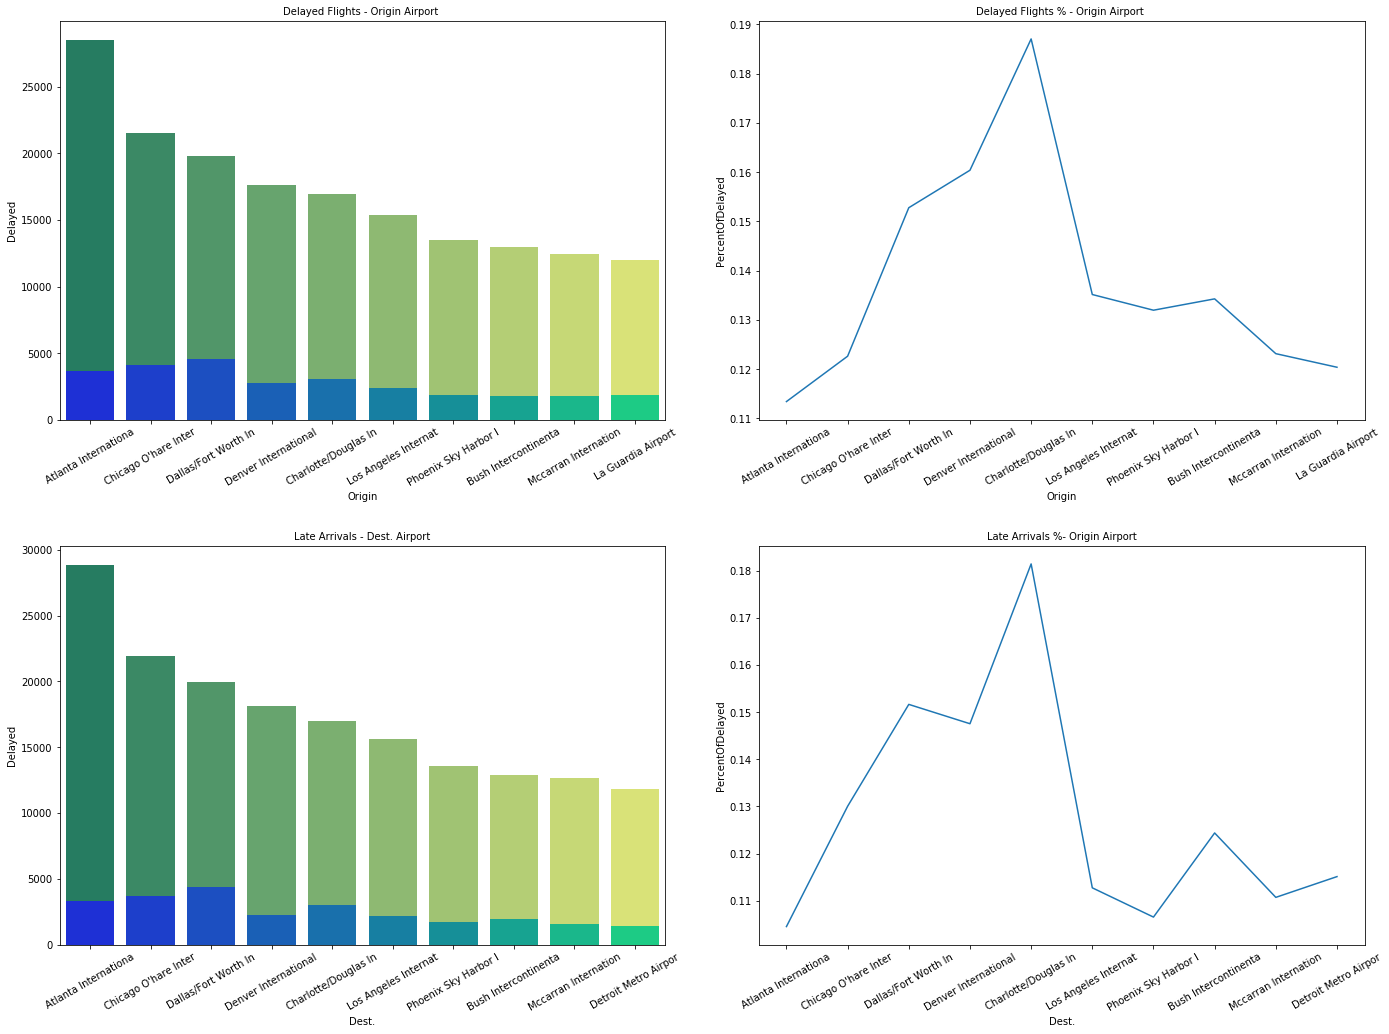

In [59]:
#Create combo chart
fig, ax = plt.subplots(2,2, figsize=(20,15))


sns.barplot(x='Origin', y='Not_Delayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), palette='summer', ax=ax[0,0])
sns.barplot(x='Origin', y='Delayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), palette='winter', ax=ax[0,0])
sns.lineplot(x='Origin', y='PercentOfDelayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), sort=True,  ax=ax[0,1])


sns.barplot(x='Dest.', y='Not_Delayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), palette='summer', ax=ax[1,0])
sns.barplot(x='Dest.', y='Delayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), palette='winter', ax=ax[1,0])
sns.lineplot(x='Dest.', y='PercentOfDelayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), sort=True,  ax=ax[1,1])

ax[0,0].set_title('Delayed Flights - Origin Airport ', fontdict={'fontsize': 10})
ax[1,0].set_title('Late Arrivals - Dest. Airport', fontdict={'fontsize': 10})
ax[0,1].set_title('Delayed Flights % - Origin Airport ', fontdict={'fontsize': 10})
ax[1,1].set_title('Late Arrivals %- Origin Airport', fontdict={'fontsize': 10})
       
ax[0,0].set_xticklabels(df_org['Origin'],rotation=30)
ax[0,1].set_xticklabels(df_org['Origin'],rotation=30)
ax[1,0].set_xticklabels(df_dest['Dest.'],rotation=30)
ax[1,1].set_xticklabels(df_dest['Dest.'],rotation=30)

fig.tight_layout(pad=3.0)

plt.show()

In [240]:
# These above plots breakdown the percentage of delayed and late arriving flights from the major aiports 
# in the USA


In [241]:
# Atlanta is the busiest airport and has the least percentage of delays. Dallas has the highest delay percentage.

In [60]:
# We can see top 10 departure time blocks and the percentage of delayed flight vs total flights.
#It seems most of the flights are in the morning. But higher percentage of delay occurs after 1700.
df_depblk=pd.DataFrame(Jan2020.groupby(["dep_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["dep_time_blk","Not_Delayed","Delayed"])
df_depblk["PercentOfDelayed"]=pd.to_numeric(df_depblk.Delayed /( df_depblk.Delayed+ df_depblk.Not_Delayed))
df_depblk.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_depblk.head(15)

,dep_time_blk,Not_Delayed,Delayed,PercentOfDelayed
14,1900-1959,27114,5945,0.179830
13,1800-1859,28928,6219,0.176943
15,2000-2059,24246,5064,0.172774
12,1700-1759,33063,6725,0.169021
16,2100-2159,15783,3167,0.167124
11,1600-1659,30183,5998,0.165778
10,1500-1559,30318,5794,0.160445
9,1400-1459,30127,5668,0.158346
17,2200-2259,12111,2124,0.149210
8,1300-1359,29476,5092,0.147304


In [285]:
# We can see top 10 departure time blocks and the percentage of delayed flight vs total flights.
#It seems most of the flights are in the morning. But higher percentage of delay occurs after 1700.
df_timeblk=pd.DataFrame(Jan2020.groupby(["flight_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["flight_time_blk","Not_Delayed","Delayed"])
df_timeblk["PercentOfDelayed"]=pd.to_numeric(df_timeblk.Delayed /( df_timeblk.Delayed+ df_timeblk.Not_Delayed))
df_timeblk.sort_values(by="Not_Delayed",ascending=False,inplace=True)
#df_timeblk.reset_index(inplace=True)
df_timeblk.head(10)

,flight_time_blk,Not_Delayed,Delayed,PercentOfDelayed
2,Early_Morn,104640,6602,0.059348
5,Morning,95681,12421,0.114901
0,Afternoon,89863,16881,0.158145
1,Early_Even,86346,18484,0.176324
4,Lunch,67363,10168,0.131148
3,Evening,52929,15882,0.230806
6,Overnight,28640,1446,0.048062


In [301]:
#melt data allow to separate bar chart
a = df_timeblk[].melt(id_vars=['flight_time_blk'])
a.head(20)

,flight_time_blk,variable,value
0,Early_Morn,Not_Delayed,104640
1,Morning,Not_Delayed,95681
2,Afternoon,Not_Delayed,89863
3,Early_Even,Not_Delayed,86346
4,Lunch,Not_Delayed,67363
5,Evening,Not_Delayed,52929
6,Overnight,Not_Delayed,28640
7,Early_Morn,Delayed,6602
8,Morning,Delayed,12421
9,Afternoon,Delayed,16881


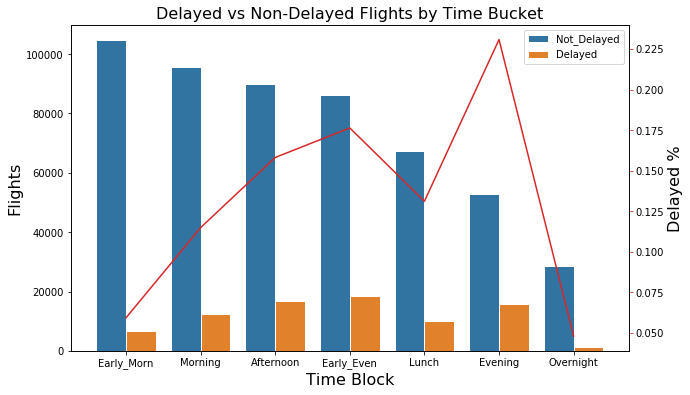

In [323]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Delayed vs Non-Delayed Flights by Time Bucket', fontsize=16)
ax1 = sns.barplot(x=a[a['variable']!='PercentOfDelayed'].flight_time_blk.values, hue=a[a['variable']!='PercentOfDelayed'].variable.values, y=a[a['variable']!='PercentOfDelayed'].value.values, edgecolor="white")
#ax1 = sns.barplot(x='flight_time_blk', y='Not_Delayed', data = df_timeblk, palette='summer',ci = None)
#ax1 = sns.barplot(x='flight_time_blk', y='Delayed', data = df_timeblk, palette='winter',ci = None)
ax1.set_xlabel('Time Block', fontsize=16)
ax1.set_ylabel('Flights', fontsize=16)
#ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='flight_time_blk', y='PercentOfDelayed', data = df_timeblk, sort=False, color=color)
ax2.set_ylabel('Delayed %', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [242]:
# The above plots look at the delayed percentage of flights based on the time of the day.

In [243]:
# Delayed flights get worse as the day moves later with the clear exception of overnight flights which are less frequent.

In [244]:
# Early morning flights are the most frequent and have a lower percentage of delays in aggregate.

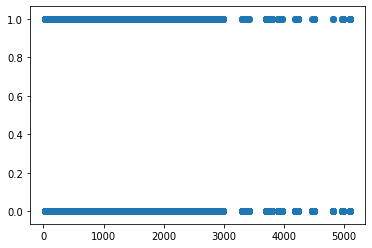

In [63]:
#From this plot we can see that there is not a clear relationship between distance and getting delays. 
plt.scatter(Jan2020["distance"],df["dep_del15"])
plt.show()

In [64]:
#put flight time into buckets and still not clear pattern.

# Its clearly seen that most of the flights are on the 4th day. Nearly %20 of flights are delayed of 6th day.
df_flt=pd.DataFrame(Jan2020.groupby(["flight_distance","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["FlightType","Not_Delayed","Delayed"])
df_flt["PercentOfDelayed"]=pd.to_numeric(df_flt.Delayed /( df_flt.Delayed+ df_flt.Not_Delayed))
df_flt.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_flt

,FlightType,Not_Delayed,Delayed,PercentOfDelayed
2,Short Haul,317155,47469,0.130186
1,Medium Haul,184797,30606,0.142087
0,Long Haul,23510,3809,0.139427


In [245]:
# no clear pattern on delay percenage based on distance


In [246]:
# these are domestic flights in the dataset, the majority of flights are short haul (<800 miles) - over 60%

In [65]:
# We can see by airlines and the percentage of delayed flight vs total flights.
df_air_d=pd.DataFrame(Jan2020.groupby([Jan2020['air_carrier_name'].str[:20],"dep_del15"])["op_carrier"].count().unstack("dep_del15").reset_index().values,columns=["Airline","Not_Delayed","Delayed"])
df_air_d["PercentOfDelayed"]=pd.to_numeric(df_air_d.Delayed /( df_air_d.Delayed+ df_air_d.Not_Delayed))
#df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_air_d.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_air_d.head(17)

,Airline,Not_Delayed,Delayed,PercentOfDelayed
10,Jetstream Intl,19653,4656,0.191534
0,Alaska Airlines,17247,3863,0.182994
1,Allegiant Air LLC,6398,1376,0.177000
5,Envoy Air,21901,4299,0.164084
11,"Mesa Airlines, Inc.",15034,2802,0.157098
13,Skywest Airlines,60324,10836,0.152277
7,"Frontier Airlines, I",10579,1888,0.151440
9,Jetblue Airways Corp,20974,3735,0.151159
2,American Airlines,65276,11000,0.144213
15,"Spirit Airlines, Inc",15074,2403,0.137495


In [66]:
# We can see by airlines and the percentage of late arrival flights flight vs total flights.
df_late=pd.DataFrame(Jan2020.groupby([Jan2020['air_carrier_name'].str[:20],"arr_del15"])["op_carrier"].count().unstack("arr_del15").reset_index().values,columns=["Airline","Not_Delayed","Delayed"])
df_late["PercentOfLateArrivals"]=pd.to_numeric(df_late.Delayed /( df_late.Delayed+ df_late.Not_Delayed))
#df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_late.sort_values(by="PercentOfLateArrivals",ascending=False,inplace=True)
df_late.head(17)

,Airline,Not_Delayed,Delayed,PercentOfLateArrivals
10,Jetstream Intl,19143,5166,0.212514
0,Alaska Airlines,16717,4393,0.208100
1,Allegiant Air LLC,6236,1538,0.197839
5,Envoy Air,21221,4979,0.190038
11,"Mesa Airlines, Inc.",14718,3118,0.174815
6,ExpressJet Airlines,8963,1601,0.151552
13,Skywest Airlines,60468,10692,0.150253
2,American Airlines,64928,11348,0.148775
9,Jetblue Airways Corp,21034,3675,0.148731
7,"Frontier Airlines, I",10672,1795,0.143980


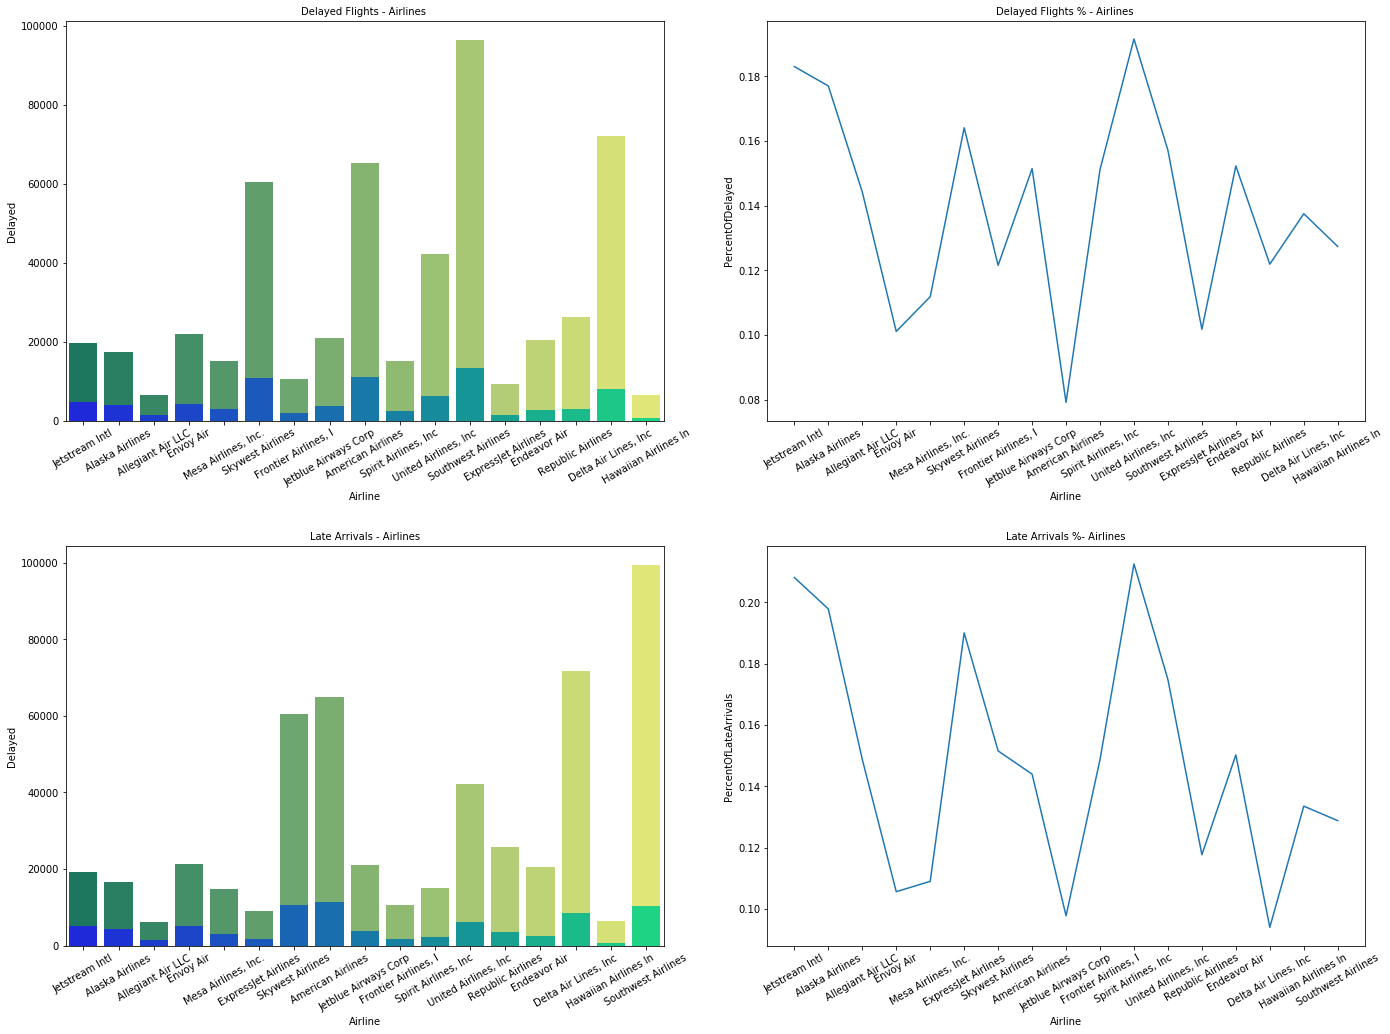

In [67]:
#Create combo chart
fig, ax = plt.subplots(2,2, figsize=(20,15))


sns.barplot(x='Airline', y='Not_Delayed', data = df_air_d, palette='summer', ax=ax[0,0])
sns.barplot(x='Airline', y='Delayed', data = df_air_d, palette='winter', ax=ax[0,0])
sns.lineplot(x='Airline', y='PercentOfDelayed', data = df_air_d, sort=True,  ax=ax[0,1])


sns.barplot(x='Airline', y='Not_Delayed', data = df_late, palette='summer', ax=ax[1,0])
sns.barplot(x='Airline', y='Delayed', data = df_late, palette='winter', ax=ax[1,0])
sns.lineplot(x='Airline', y='PercentOfLateArrivals', data = df_late, sort=True,  ax=ax[1,1])

ax[0,0].set_title('Delayed Flights - Airlines ', fontdict={'fontsize': 10})
ax[1,0].set_title('Late Arrivals - Airlines', fontdict={'fontsize': 10})
ax[0,1].set_title('Delayed Flights % - Airlines ', fontdict={'fontsize': 10})
ax[1,1].set_title('Late Arrivals %- Airlines', fontdict={'fontsize': 10})
       
ax[0,0].set_xticklabels(df_air_d['Airline'],rotation=30)
ax[0,1].set_xticklabels(df_air_d['Airline'],rotation=30)
ax[1,0].set_xticklabels(df_late['Airline'],rotation=30)
ax[1,1].set_xticklabels(df_late['Airline'],rotation=30)

fig.tight_layout(pad=3.0)

plt.show()

In [250]:
# There is a significant disparity between airlines on delay percentage rates. Some airlines over double from others.

In [251]:
# Southwest and Delta are the busiest airlines with middle of the range - delay percentages. Jetstream, Allegiant are the worst performers.

In [252]:
# Its clearly seen that most of the flights are on the 4th day. Nearly %20 of flights are delayed of 6th day.
df_dow=pd.DataFrame(Jan2020.groupby(["dayofweek_name","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["DayofWeek","Not_Delayed","Delayed"])
df_dow["PercentOfDelayed"]=pd.to_numeric(df_dow.Delayed /( df_dow.Delayed+ df_dow.Not_Delayed))
df_dow.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_dow

,DayofWeek,Not_Delayed,Delayed,PercentOfDelayed
4,Thursday,89743,13933,0.134390
0,Friday,87942,15870,0.152873
6,Wednesday,87240,9559,0.098751
1,Monday,71213,11176,0.135649
5,Tuesday,69086,7558,0.098612
3,Sunday,67180,11326,0.144269
2,Saturday,53058,12462,0.190201


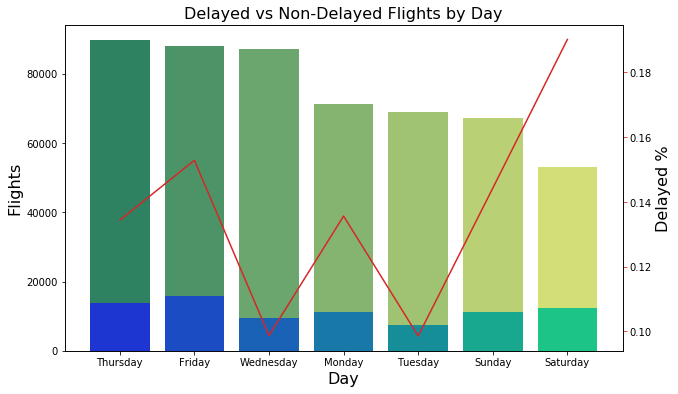

In [324]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Delayed vs Non-Delayed Flights by Day', fontsize=16)
ax1 = sns.barplot(x='DayofWeek', y='Not_Delayed', data = df_dow, palette='summer')
ax1 = sns.barplot(x='DayofWeek', y='Delayed', data = df_dow, palette='winter')
ax1.set_xlabel('Day', fontsize=16)
ax1.set_ylabel('Flights', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='DayofWeek', y='PercentOfDelayed', data = df_dow, sort=False, color=color)
ax2.set_ylabel('Delayed %', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [325]:
# The busiest day for flights are Weds through Friday. Tuesday and Weds have the least delays. Saturday has the least flights but the
# highest percentage of delayed flights.

## 5.1 Interactive chart - Multi-dimension Bucketing Examples

## 5.1.1 By Airports

In [191]:
#grouping up airports and time buckets on delay percentage of flights
AirportTime=pd.DataFrame(Jan2020.groupby([Jan2020['origin_airport'].str[:20],"flight_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Airport","Flight_Bucket","Not_Delayed","Delayed"])
AirportTime['Not_Delayed'].fillna(value=0, axis=0, inplace=True)
AirportTime['Delayed'].fillna(value=0, axis=0, inplace=True)
AirportTime["PercentOfDelayed"]=pd.to_numeric(AirportTime.Delayed /( AirportTime.Delayed+ AirportTime.Not_Delayed))
AirportTime["Flights"]=pd.to_numeric(AirportTime.Delayed+ AirportTime.Not_Delayed)
AirportTime.sort_values(by="Flights",ascending=False,inplace=True)
AirportTime.head(20)
 

,Airport,Flight_Bucket,Not_Delayed,Delayed,PercentOfDelayed,Flights
97,Atlanta Internationa,Evening,5419.0,939.0,0.147688,6358.0
99,Atlanta Internationa,Morning,5468.0,674.0,0.109736,6142.0
94,Atlanta Internationa,Afternoon,5330.0,670.0,0.111667,6000.0
95,Atlanta Internationa,Early_Even,4630.0,713.0,0.133446,5343.0
381,Chicago O'hare Inter,Morning,4251.0,715.0,0.143979,4966.0
377,Chicago O'hare Inter,Early_Even,3824.0,885.0,0.187938,4709.0
473,Dallas/Fort Worth In,Morning,3744.0,791.0,0.174421,4535.0
516,Denver International,Morning,4046.0,452.0,0.100489,4498.0
469,Dallas/Fort Worth In,Early_Even,3358.0,1088.0,0.244714,4446.0
468,Dallas/Fort Worth In,Afternoon,3529.0,886.0,0.200680,4415.0


In [218]:
#breakdown of airport and time buckets where flights > 500
airport = AirportTime[AirportTime['Flights']>500].pivot_table(
                         index='Airport', 
                         columns='Flight_Bucket', 
                         values='PercentOfDelayed', 
                         aggfunc='sum',
                         fill_value=0).reset_index()
                  
                         

airport

Flight_Bucket,Airport,Afternoon,Early_Even,Early_Morn,Evening,Lunch,Morning,Overnight
0,Atlanta Internationa,0.111667,0.133446,0.042344,0.147688,0.102460,0.109736,0.000000
1,Austin-Bergstrom Int,0.144605,0.143141,0.033972,0.000000,0.112434,0.100260,0.000000
2,Baltimore / Washingt,0.174203,0.163696,0.049140,0.271739,0.105386,0.113567,0.000000
3,Boise Airport,0.000000,0.000000,0.036190,0.000000,0.000000,0.000000,0.000000
4,Boston Logan Interna,0.130535,0.164276,0.054753,0.260947,0.101161,0.089372,0.028986
5,Burbank Bob Hope Air,0.094444,0.000000,0.043876,0.000000,0.000000,0.000000,0.000000
6,Bush Intercontinenta,0.104375,0.121761,0.054237,0.295172,0.160455,0.088409,0.000000
7,Charlotte/Douglas In,0.168847,0.213377,0.061415,0.212246,0.153657,0.088582,0.000000
8,Chicago Midway Airpo,0.235014,0.200605,0.048443,0.300337,0.088206,0.157773,0.000000
9,Chicago O'hare Inter,0.177936,0.187938,0.080454,0.268343,0.136267,0.143979,0.024470


In [219]:
#conversion of pivot table into dataframe
columns = ['Airport','1.Early_Morn','2.Morning','3.Lunch','4.Afternoon','5.EarlyEven','6.Evening','7.Overnight']
data = (airport.Airport,airport.Early_Morn, airport.Morning,airport.Lunch,airport.Afternoon, airport.Early_Even, airport.Evening, airport.Overnight )
newdata = np.asarray(data)
newdata
df_airport = pd.DataFrame(newdata.T,columns=columns)
df_airport.reset_index()
df_airport

,Airport,1.Early_Morn,2.Morning,3.Lunch,4.Afternoon,5.EarlyEven,6.Evening,7.Overnight
0,Atlanta Internationa,0.0423437,0.109736,0.10246,0.111667,0.133446,0.147688,0
1,Austin-Bergstrom Int,0.0339721,0.10026,0.112434,0.144605,0.143141,0,0
2,Baltimore / Washingt,0.04914,0.113567,0.105386,0.174203,0.163696,0.271739,0
3,Boise Airport,0.0361905,0,0,0,0,0,0
4,Boston Logan Interna,0.0547529,0.089372,0.101161,0.130535,0.164276,0.260947,0.0289855
5,Burbank Bob Hope Air,0.0438757,0,0,0.0944444,0,0,0
6,Bush Intercontinenta,0.0542373,0.0884092,0.160455,0.104375,0.121761,0.295172,0
7,Charlotte/Douglas In,0.0614152,0.0885818,0.153657,0.168847,0.213377,0.212246,0
8,Chicago Midway Airpo,0.0484429,0.157773,0.0882061,0.235014,0.200605,0.300337,0
9,Chicago O'hare Inter,0.080454,0.143979,0.136267,0.177936,0.187938,0.268343,0.0244698


In [220]:
#needed to melt the data for input into heat map
airportdata = df_airport.melt(id_vars=['Airport'])
airportdata.head()

,Airport,variable,value
0,Atlanta Internationa,1.Early_Morn,0.0423437
1,Austin-Bergstrom Int,1.Early_Morn,0.0339721
2,Baltimore / Washingt,1.Early_Morn,0.04914
3,Boise Airport,1.Early_Morn,0.0361905
4,Boston Logan Interna,1.Early_Morn,0.0547529


In [221]:
import altair as alt
from vega_datasets import data

source = airportdata


chart = alt.Chart(airportdata).mark_rect().encode(
    x=alt.X('variable:N', axis=alt.Axis(title="Time Bucket", labelAngle=45)),
    y=alt.Y('Airport:N', title="Airport"),
    color=alt.Color('value:Q', title="Intensity"),
     tooltip = [alt.Tooltip('value:Q'),
               alt.Tooltip('Airport:N'),
               alt.Tooltip('variable:N')
              ]

).properties(
    width=500,
    title='Airport delays by Time Bucket'
)
chart = chart.configure_title(fontSize=15, offset=5, orient='top', anchor='middle')

chart

alt.Chart(...)

In [176]:
## please note that you can hover over any cell in the above heatmap and get the specific data on the cell.

In [185]:
## some takeaways from the heat map:

In [ ]:
# 1. early mornings seem to the best time to avoid delayed flights

In [186]:
# 2. evenings are clearly the worse time for delayed flights


In [187]:
# 3. the delays seem to be get worse through the day

In [188]:
# 4. the hubs look to be the worse - Dallas, Chicago, New York

# 5.1.2 by Airline

In [195]:
#grouping up airports and time buckets on delay percentage of flights
AirlineTime=pd.DataFrame(Jan2020.groupby([Jan2020['air_carrier_name'].str[:20],"flight_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Airline","Flight_Bucket","Not_Delayed","Delayed"])
AirlineTime['Not_Delayed'].fillna(value=0, axis=0, inplace=True)
AirlineTime['Delayed'].fillna(value=0, axis=0, inplace=True)
AirlineTime["PercentOfDelayed"]=pd.to_numeric(AirlineTime.Delayed /( AirlineTime.Delayed+ AirlineTime.Not_Delayed))
AirlineTime["Flights"]=pd.to_numeric(AirlineTime.Delayed+ AirlineTime.Not_Delayed)
AirlineTime.sort_values(by="Flights",ascending=False,inplace=True)
AirlineTime.head(20)

,Airline,Flight_Bucket,Not_Delayed,Delayed,PercentOfDelayed,Flights
100,Southwest Airlines,Early_Morn,20726,888,0.041084,21614
99,Southwest Airlines,Early_Even,16899,3361,0.165893,20260
98,Southwest Airlines,Afternoon,16227,2817,0.147921,19044
103,Southwest Airlines,Morning,16918,1882,0.100106,18800
23,"Delta Air Lines, Inc",Early_Morn,14385,757,0.049993,15142
16,American Airlines,Early_Morn,13897,948,0.063860,14845
102,Southwest Airlines,Lunch,13230,1450,0.098774,14680
19,American Airlines,Morning,12130,1806,0.129592,13936
26,"Delta Air Lines, Inc",Morning,12512,1245,0.090499,13757
21,"Delta Air Lines, Inc",Afternoon,12091,1554,0.113888,13645


In [200]:
#breakdown of airline and time buckets where flights > 100
airline = AirlineTime[AirlineTime['Flights']>100].pivot_table(
                         index='Airline', 
                         columns='Flight_Bucket', 
                         values='PercentOfDelayed', 
                         aggfunc='sum',
                         fill_value=0).reset_index()
                  
                         

airline

Flight_Bucket,Airline,Afternoon,Early_Even,Early_Morn,Evening,Lunch,Morning,Overnight
0,Alaska Airlines,0.190970,0.209014,0.098089,0.323721,0.191838,0.168891,0.099894
1,Allegiant Air LLC,0.202998,0.271576,0.058076,0.400000,0.165894,0.125594,0.104348
2,American Airlines,0.169782,0.197338,0.063860,0.224867,0.147764,0.129592,0.058401
3,"Delta Air Lines, Inc",0.113888,0.127144,0.049993,0.164027,0.108925,0.090499,0.033795
4,Endeavor Air,0.119292,0.137690,0.070435,0.187309,0.111182,0.105447,0.016188
5,Envoy Air,0.199807,0.224260,0.086126,0.230800,0.169025,0.149002,0.019755
6,ExpressJet Airlines,0.118421,0.172080,0.049672,0.313272,0.125700,0.090260,0.016949
7,"Frontier Airlines, I",0.160021,0.184136,0.084842,0.222330,0.138235,0.107499,0.150125
8,Hawaiian Airlines In,0.149508,0.095337,0.027491,0.051188,0.096216,0.051554,0.034653
9,Jetblue Airways Corp,0.177412,0.216700,0.069082,0.235418,0.127776,0.099795,0.105699


In [211]:
#conversion of pivot table into dataframe
columns = ['Airline','1.Early_Morn','2.Morning','3.Lunch','4.Afternoon','5.EarlyEven','6.Evening','7.Overnight']
data = (airline.Airline,airline.Early_Morn, airline.Morning,airline.Lunch,airline.Afternoon, airline.Early_Even, airline.Evening, airline.Overnight )
newdata = np.asarray(data)
newdata
df_airline = pd.DataFrame(newdata.T,columns=columns)
df_airline.reset_index()
df_airline

,Airline,1.Early_Morn,2.Morning,3.Lunch,4.Afternoon,5.EarlyEven,6.Evening,7.Overnight
0,Alaska Airlines,0.0980889,0.168891,0.191838,0.19097,0.209014,0.323721,0.0998937
1,Allegiant Air LLC,0.0580762,0.125594,0.165894,0.202998,0.271576,0.4,0.104348
2,American Airlines,0.0638599,0.129592,0.147764,0.169782,0.197338,0.224867,0.0584011
3,"Delta Air Lines, Inc",0.0499934,0.0904994,0.108925,0.113888,0.127144,0.164027,0.0337955
4,Endeavor Air,0.0704345,0.105447,0.111182,0.119292,0.13769,0.187309,0.0161884
5,Envoy Air,0.0861255,0.149002,0.169025,0.199807,0.22426,0.2308,0.0197548
6,ExpressJet Airlines,0.0496725,0.0902601,0.1257,0.118421,0.17208,0.313272,0.0169492
7,"Frontier Airlines, I",0.0848422,0.107499,0.138235,0.160021,0.184136,0.22233,0.150125
8,Hawaiian Airlines In,0.0274914,0.0515537,0.0962162,0.149508,0.0953368,0.0511883,0.0346535
9,Jetblue Airways Corp,0.0690815,0.0997949,0.127776,0.177412,0.2167,0.235418,0.105699


In [212]:
#needed to melt the data for input into heat map
airlinedata = df_airline.melt(id_vars=['Airline'])
airlinedata.head()

,Airline,variable,value
0,Alaska Airlines,1.Early_Morn,0.0980889
1,Allegiant Air LLC,1.Early_Morn,0.0580762
2,American Airlines,1.Early_Morn,0.0638599
3,"Delta Air Lines, Inc",1.Early_Morn,0.0499934
4,Endeavor Air,1.Early_Morn,0.0704345


In [213]:
import altair as alt
from vega_datasets import data

source2 = airlinedata

chart2 = alt.Chart(airlinedata).mark_rect().encode(
    x=alt.X('variable:N', axis=alt.Axis(title="Time Bucket", labelAngle=45)),
    y=alt.Y('Airline:N', title="Airline"),
    color=alt.Color('value:Q', title="Intensity"),
     tooltip = [alt.Tooltip('value:Q'),
               alt.Tooltip('Airline:N'),
               alt.Tooltip('variable:N')
              ]

).properties(
    width=500,
    title='Airline delays by Time Bucket'
)
chart2 = chart2.configure_title(fontSize=15, offset=5, orient='top', anchor='middle')

chart2

alt.Chart(...)

In [206]:
# some takeaways from the data:

In [207]:
# 1. as expected, the same patterns around getting worse during the day as for airports, evening being the worse.

In [208]:
# 2. Delta airlines looks amongst the stronger performer in delayed flights.

In [209]:
# 3. Least powerful airlines seem to perform worse such as Allegiant and Jetsteam. Major players may have more power.

In [222]:
# n.b. deciding to relax the filter on airlines per time bucket (>500) vs airports (>1000) as airports 
# are likely to be busier per time bucket than  airlines. It removed some of the small regional airport 
# which are not been used regularly.

## 6. Conclusion






This was a very useful dataset as it allowed a few columns to be created, some cleaning was required and there are some nice patterns to explore in the dataset.

The next steps would be to run some multi-dimensional analysis on top of what has been found in the opening exploratory analysis.

1. clear pattern of delays based on time buckets

2. clear patterns with airlines and airports on delays

3. No real evidence of delay pattern based on the flight distance in this dataset.


Some of the pre-bucketed data not accurate so as the alignment of departure time to the departure time buckets. The time bucket which I created seems very useful.

The merging of airport names to the dataset was not perfect but only affected less than 5 percent of the dataset. For the airport based analysis, I excluded this from the analysis.

## 7.0 Future Work

In [ ]:
# multi-dimensional analysis would be useful, combining airlines, airports, time buckets where there are distinct patterns

In [ ]:
# 5 hypotheses

# * Null Hypothesis * > a
# * Significant other * > b

In [ ]:
# mean of delayed flights is?

In [ ]:
# mean of delayed flights per time bucket?

In [ ]:
# is there a more significant change in delay based on time bucket?

In [248]:
# is there a more significant change in delay based on airport and time bucket?

In [247]:
# is there a more significant change in delay based on airline and time bucket?

## 8.0 Appendix - Missing Airport Names

In [51]:
df1 = Jan2020.loc[Jan2020['origin_airport'] == 'Misc.' ]
df1.head()

,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,dest_airport,dest_city,origin_airport,origin_city,flight_distance,dayofweek_name
417,2,4,20366,EV,3979,11481,1148102,ECP,12266,1226603,IAH,642.0,0.0,0600-0659,913.0,1.0,0.0,0.0,572.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Misc.,Misc.,Short Haul,Thursday
478,2,4,20366,EV,4052,11481,1148102,ECP,12266,1226603,IAH,1657.0,1.0,1600-1659,1933.0,1.0,0.0,0.0,572.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Misc.,Misc.,Short Haul,Thursday
737,3,5,20366,EV,3979,11481,1148102,ECP,12266,1226603,IAH,638.0,0.0,0600-0659,850.0,0.0,0.0,0.0,572.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Misc.,Misc.,Short Haul,Friday
799,3,5,20366,EV,4052,11481,1148102,ECP,12266,1226603,IAH,1714.0,1.0,1600-1659,1923.0,1.0,0.0,0.0,572.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Misc.,Misc.,Short Haul,Friday
1090,4,6,20366,EV,3979,11481,1148102,ECP,12266,1226603,IAH,642.0,0.0,0600-0659,848.0,0.0,0.0,0.0,572.0,ExpressJet Airlines,Bush Intercontinental Airport,Houston,Misc.,Misc.,Short Haul,Saturday


In [52]:
# 13 airports, 0.3% of dataset
df1.origin.value_counts()

AZA    495
ECP    476
FCA    264
HHH    186
SCE    116
USA    112
PBG    108
MQT     95
XWA     68
IAG     55
VEL     53
SPN     44
BFM     13
Name: origin, dtype: int64